# **Exploratory Data Analysis on Spotify Daily Charts over 3 Years**

![](https://i.imgur.com/TYqXD8z.png)

## **Outline of the Project**

- Downloading the dataset from the online source
- Installing the Required Packages
- Data Preparation and cleaning using pandas
- Performing exploratory analysis & visualization
- Questioning and answering the questions with different visualization using matplotlib, plotly and seaborn 

## **How to Run Code**

The easiest way to start executing is to click the Run button and select "Run on Colab" and you'll need to create an account to use Google Colab/Kaggle to use the platform, and to execute the code click on "Runtime" button at the top of this page and select "Run Selection" on Colab. You can also select "Run on Binder". You can make changes and save your own version of the notebook to Jovian by executing the following cells.

When you are commiting the notebook to Jovian for the first time in "Colab" it will ask for API key which will be found in your Jovian account getstarted section.

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/8smbhavikatti/spotify-songs-analysis


'https://jovian.ai/8smbhavikatti/spotify-songs-analysis'

## **Downloading the dataset from online source**

This is the huge dataset contains all the songs in Spotify's Daily Top 200 charts in 35+1 (global) countries around the world for a period of over 3 years(2017-2020), this dataset contains 170633 rows of data and 151 Columns of data

You can find the dataset [here](https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years) We'll use the opendatasets library to download the dataset from Kaggle datasets. We have already installed and imported opendatasets library as od in the above section of installing required libraries.

In [8]:
download_url = "https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years"

We'll download the dataset using od.download. 

You can also go through the downloaded files using the "File" option left side in Colab, We have one folder i.e spotify-huge-database-daily-charts-over-3-years"
- "Database to Calculate Popularity" includes all the daily entries (8mln+) for the songs which made it to the top 200.mong these data, quite intuitively, you will find the same song being in the charts for more than one day.and then there is popularity score, unique for a given song in a given country, which took into account the position in the charts and the days it stayed there
- "Final Database" includes many data for each song. It aggregates the populairty for songs into a single score for each. For each song several variables were retrieved by using Spotify's API (such as artist, country, genre, …)

The 8+mln songs of the first database are reduced to "only" tens of thousands in the other, because the POPULARITY score was created by US and aggregated into a single score the whole period a same song stayed in the charts of the same country. The popularity given by Spotify takes into account the time at which data are seen, hence a song which dominated the charts a few years back now scores very low in this parameter. This is why they created a new score which includes the number of days a song stayed in the charts and at which position, adjusted with a modificator to give more weight to top positions.

To know the description of every cloumn click [here](https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years)

While downloading the dataset from kaggle it will ask for kaggle username and key and these will be found in your kaggle account API section.

In [9]:
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sushmabhavikatti
Your Kaggle Key: ··········


100%|██████████| 191M/191M [00:02<00:00, 75.1MB/s]


In [10]:
data_filename= './spotify-huge-database-daily-charts-over-3-years/Final database.csv'

In [11]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/8smbhavikatti/spotify-songs-analysis


'https://jovian.ai/8smbhavikatti/spotify-songs-analysis'

## **Installing the Required Packages**

In [5]:
!pip install opendatasets --upgrade --quiet
!pip install folium --quiet

In [6]:
# numerical computing libraryimport numpy
import sys
# Data analysis library in python
import pandas as pd
# library for downloading datasets from online sources
import opendatasets as od
#  for creating static visualizations in Python
import matplotlib.pyplot as plt
import numpy as mp
import seaborn as sn
#for creating interactive visualizations
import plotly.express as px

In [7]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...


[jovian] Error: Looks like the notebook is missing output cells, please save the notebook and try jovian.commit again.


Committed successfully! https://jovian.ai/8smbhavikatti/spotify-songs-analysis


'https://jovian.ai/8smbhavikatti/spotify-songs-analysis'

## **Data Preparation and cleaning using pandas**

#### **Load the file using pandas**

In [12]:
# load the dataset and display the dataframe
raw_df = pd.read_csv(data_filename);

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
raw_df

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,...,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,...,0,1,0,0,0,0,21,0.0,1.0,english speaking and nordic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,True,SmallTown,...,0,0,1,0,0,0,162,0.0,0.0,english speaking and nordic
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,False,摩天動物園,...,0,0,1,0,0,0,130,0.0,0.0,english speaking and nordic
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38.0,False,Freedom,...,0,0,1,0,0,0,133,0.0,0.0,english speaking and nordic
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,False,有吉他的流行歌曲,...,0,0,1,0,0,0,174,0.0,0.0,english speaking and nordic


#### **Some information about the data and the columns**

In [14]:
# Checking the shape of DataFrame
raw_df.shape

(170633, 151)

In [15]:
# Displaying Columns
print(raw_df.columns)

Index(['Country', 'Uri', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Explicit', 'Album',
       ...
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'UK', 'USA', 'Popu_max',
       'Top10_dummy', 'Top50_dummy', 'Cluster'],
      dtype='object', length=151)


There are 151 Columns in the dataset, we are selecting some column for further analysis

In [16]:
selected_columns=['Country','Uri','Popularity','Title'	,'Artist',	'Album/Single',	'Genre'	,'Artist_followers','Album','Release_date',	'Track_number','Tracks_in_album',	
                  'danceability',	'loudness',	'duration_ms','Days_since_release',	'Released_after_2017','Explicit_false',	'Explicit_true','single','joy',	'sadness','negative',	
                  'positive','Argentina',	'Australia',	'Austria',	'Belgium',	'Brazil',	'Canada',	'Colombia',		'Denmark',		'Finland',	'France',	'Germany',		'Indonesia',	
                  'Ireland',	'Italy','Malaysia',	'Mexico','Netherlands',	'New Zealand',	'Norway','Peru',	'Philippines',	'Poland',	'Portugal',	'Singapore',	'Spain','Sweden',
                  'Switzerland','UK',	'USA']

In [17]:
#Checking the type of variable
type(selected_columns)

list

Storing contries into a List

Creating a copy of original Dataframe so that we will be having a copy of original dataframe if we want to revert the change to original

In [18]:
df=raw_df[selected_columns].copy()

In [19]:
# .shape fucntion shows the number of columns and rows present in dataframe
df.shape

(170633, 53)

In [20]:
# .info() function shows the column name,datatype and etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 53 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Country              170633 non-null  object 
 1   Uri                  170633 non-null  object 
 2   Popularity           170633 non-null  float64
 3   Title                170633 non-null  object 
 4   Artist               170633 non-null  object 
 5   Album/Single         170633 non-null  object 
 6   Genre                170633 non-null  object 
 7   Artist_followers     170592 non-null  object 
 8   Album                170633 non-null  object 
 9   Release_date         170633 non-null  object 
 10  Track_number         170633 non-null  object 
 11  Tracks_in_album      170633 non-null  object 
 12  danceability         170633 non-null  object 
 13  loudness             170633 non-null  object 
 14  duration_ms          170633 non-null  object 
 15  Days_since_releas

Let's use pandas describe method to get statistical calculations of numerical columns.

In [21]:
df.describe()

,Popularity,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,single,joy,sadness,negative,positive,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA
count,170633.000000,167411.000000,167411.000000,170633.000000,170633.000000,170633.000000,71866.000000,71866.000000,71866.000000,71866.000000,...,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.00000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,1337.530228,0.845667,0.651287,0.348684,0.435795,3.191662,2.757911,5.433139,5.441572,...,0.015829,0.016445,0.030903,0.026894,0.021233,0.02513,0.040848,0.045044,0.038328,0.038943
std,13115.854526,2453.554101,0.361269,0.476564,0.476555,0.495862,2.390431,2.497265,4.774120,4.137666,...,0.124815,0.127178,0.173054,0.161774,0.144160,0.15652,0.197938,0.207401,0.191987,0.193460
min,0.800000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,77.600000,428.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,515.150000,834.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3867.850000,1240.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,233766.900000,44128.000000,1.000000,1.000000,1.000000,1.000000,21.000000,24.000000,44.000000,45.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


#### **Fixing missing/incorrect values and some operations**


#### **Renaming the column as per the requirement**

For renaming the columns the function used is as follows "df.rename(columns={"Old col name" : "New col name"})"

In [22]:
df = df.rename(columns = {"Uri": "URL"})

In [23]:
df

,Country,URL,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album,Release_date,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,Adan y Eva,2018-11-05,...,0,0,0,0,0,0,0,0,0,0
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,Adan y Eva,2018-11-05,...,0,0,0,0,0,0,0,0,0,1
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,Adan y Eva,2018-11-05,...,0,0,0,0,0,0,0,0,0,0
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,Adan y Eva,2018-11-05,...,0,0,0,0,0,0,0,0,0,0
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,Adan y Eva,2018-11-05,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170628,Taiwan,https://open.spotify.com/track/4v29A51TqtD2KFS...,31.20,smalltown,Luke Christopher,single,indie pop rap,152740.0,SmallTown,2017-07-07,...,0,0,0,0,0,0,0,0,0,0
170629,Taiwan,https://open.spotify.com/track/7InvbALrXpsz58J...,156.00,灰狼,G.E.M.,album,mandopop,1225408.0,摩天動物園,2019-12-26,...,0,0,0,0,0,0,0,0,0,0
170630,Taiwan,https://open.spotify.com/track/5rCNIuDc3VD7q6H...,90.40,預念患者,張赫宣,album,n-a,38.0,Freedom,2017-06-28,...,0,0,0,0,0,0,0,0,0,0
170631,Taiwan,https://open.spotify.com/track/0525Cll5exsrybt...,21.60,清晨巴士,Crowd Lu,album,chinese indie,149875.0,有吉他的流行歌曲,2012-11-20,...,0,0,0,0,0,0,0,0,0,0


#### **Converting the Release_date column with datetime in Pandas**

In [24]:
df.Release_date

0         2018-11-05
1         2018-11-05
2         2018-11-05
3         2018-11-05
4         2018-11-05
             ...    
170628    2017-07-07
170629    2019-12-26
170630    2017-06-28
170631    2012-11-20
170632    2017-07-11
Name: Release_date, Length: 170633, dtype: object

Initially the "Release_date" column was in Object type, here we are convrt it to datetime

 - errors='coerce' - It will replace all non-numeric values with NaN

In [25]:
df.Release_date = pd.to_datetime(df["Release_date"],errors='coerce')

In [26]:
df.Release_date[0]

Timestamp('2018-11-05 00:00:00')

#### **Dropping the rows where no data is available**

In [27]:
df.drop(df[df['Release_date'] == 'n-a'].index,inplace=True)
df[ (df['Release_date'] == 'n-a')]

,Country,URL,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album,Release_date,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA


In [28]:
df.drop(df[df['Album/Single'] == 'n-a'].index,inplace=True)
df[ (df['Album/Single'] == 'n-a')]

,Country,URL,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album,Release_date,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA


In [29]:
df.drop(df[df['Tracks_in_album'] == 'n-a'].index,inplace=True)
df[ (df['Tracks_in_album'] == 'n-a')]

,Country,URL,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album,Release_date,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA


In [30]:
df.drop(df[df['duration_ms'] == 'n-a'].index,inplace=True)
df[(df['duration_ms'] == 'n-a')]

,Country,URL,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Album,Release_date,...,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,UK,USA


## **Open-ended exploratory analysis and visualization**



We will Analyse the data with some visualization

In [31]:
#Shows all th Columns from the dataset
df.columns

Index(['Country', 'URL', 'Popularity', 'Title', 'Artist', 'Album/Single',
       'Genre', 'Artist_followers', 'Album', 'Release_date', 'Track_number',
       'Tracks_in_album', 'danceability', 'loudness', 'duration_ms',
       'Days_since_release', 'Released_after_2017', 'Explicit_false',
       'Explicit_true', 'single', 'joy', 'sadness', 'negative', 'positive',
       'Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Colombia', 'Denmark', 'Finland', 'France', 'Germany', 'Indonesia',
       'Ireland', 'Italy', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Singapore',
       'Spain', 'Sweden', 'Switzerland', 'UK', 'USA'],
      dtype='object')

Columns we will analyse:
1. Country
2. Tracks_in_album
3. sadness
4. Days_since_release
5. Popularity
6. danceability
7. Released_after_2017
8. duration_ms
9. Release_date

In [32]:
len(df.Country.unique())

35

### **Percentage of missing values per columns**

We will calulate the missing values per every columns

In [33]:
# .isna() - returns a DataFrame object where all the values are replaced with a Boolean value True for NA (not-a -number) values, and otherwise False
# .sum() - adds all values in each column and returns the sum for each column
# .sort_values() -  sorts a data frame in Ascending or Descending order of passed Column
# Finally, we are converting the value into %
Missing_percentage=df.isna().sum().sort_values(ascending=False) / len(df) *100

In [34]:
# Selecting only the value that are not equal to 0
Missing_percentage[Missing_percentage != 0]

positive               57.881473
negative               57.881473
sadness                57.881473
joy                    57.881473
Days_since_release      1.885388
Released_after_2017     1.885388
Artist_followers        0.024029
dtype: float64

We are visualizing the the result with **Horizontal Bar plot**

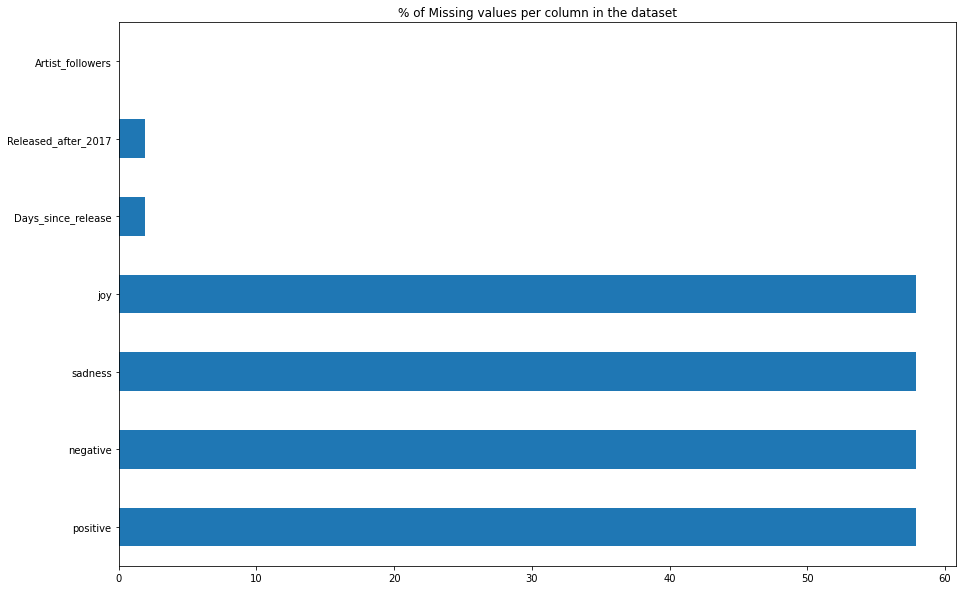

In [35]:
# Plotting bar graph for the percentage which is not equals to zero
# .plot(kind='barh') is used for horizontal bar graph
# .figsize() is used for length and width of the graph
Missing_percentage[Missing_percentage != 0].plot(kind='barh',figsize=(15,10),title="% of Missing values per column in the dataset");

**Observation**: From the above plot, We can see that, there are missing values in some of the rows in 5 Columns and we have plotted horizontal bar graph with the missing percentage

### **Top 20 Countries that published Albums and their Counts**

We are Couting the Countries by Albums

In [36]:
Album_by_countries=df.Country.value_counts().sort_values(ascending=False)
Album_by_countries[:20]

Switzerland    7686
Taiwan         7594
Sweden         6970
Germany        6941
Finland        6783
Netherlands    6696
USA            6645
UK             6540
Austria        6529
France         6449
Norway         6074
Belgium        6038
Canada         5635
Global         5461
Ireland        5371
Poland         5273
Denmark        5234
Italy          5219
Portugal       4589
Spain          4287
Name: Country, dtype: int64

We'll visualize top 20 result with **Horizontal bar plot**

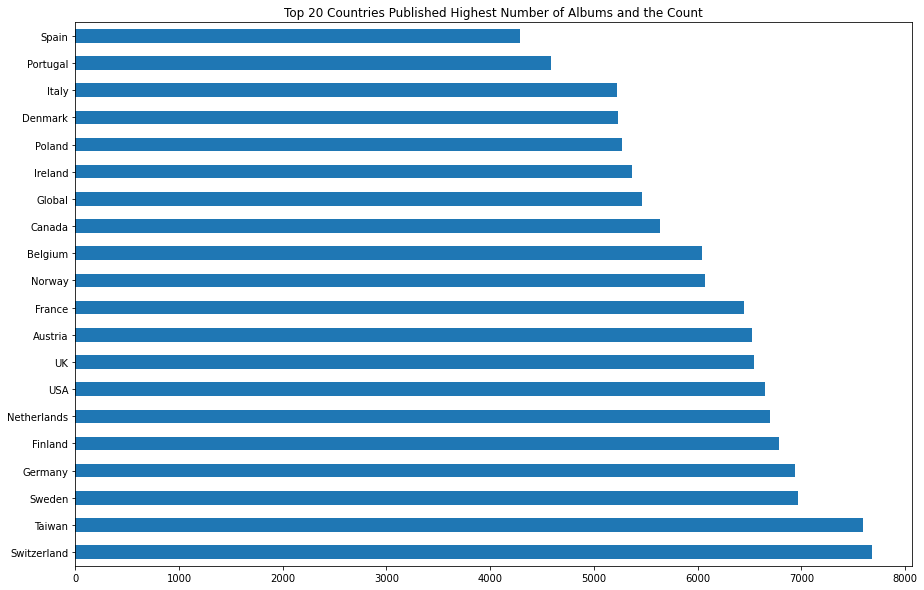

In [37]:
Album_by_countries[:20].plot(kind='barh',figsize=(15,10),title="Top 20 Countries Published Highest Number of Albums and the Count");

**Observation**: From the above plot, we can say that switzerland has published the highest number of Albums that is 7686.

### **Analysing the number of Albums published and countires by their Range**

From the above analysis, We will visualize the Country by their Range with **Matplotlib Histplot**

In [38]:
import seaborn as sns

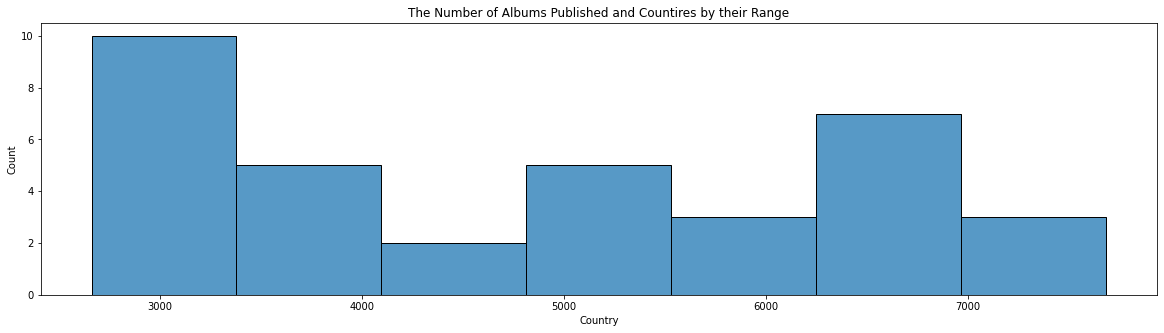

In [39]:
plt.figure(figsize=(20,5))
sns.histplot(Album_by_countries).set(title="The Number of Albums Published and Countires by their Range");

**Observation**: From the above plot, you can say that 
- 10 countries have published around the range between 1500 to 3200 Approximately
- 5 countries have published around the range between 3200 to 4000 Approximately and so on.

### **Sorting the Albums by Realse Date**

Here, We are sorting the Album's Release date.

In [40]:
Sorting_by_date=df.Release_date.sort_values(ascending=True)
df.groupby([df.Release_date.sort_values(ascending=True),'Album']).size().head(10)

Release_date  Album                                                      
1899-12-31    The Best of The Royal Marines                                   1
1900-01-11    Sing & Swing!                                                   1
1929-01-01    Cliff Edwards, Ukelele Ike                                      1
1939-01-01    Ultimate Big Band Collection: Glenn Miller                      2
1939-09-01    In the Mood                                                     1
1942-01-01    Holiday Inn (Original Motion Picture Soundtrack)               31
1944-01-01    Meet Me In St. Louis (Original Soundtrack Recording)            7
1945-01-01    White Christmas                                                34
1946-01-01    Personal Christmas Collection                                   2
1947-01-01    Rudolph The Red Nosed Reindeer And Other Christmas Classics    16
dtype: int64

**Observation:** From the above analysis we can say that "The Best of The Royal Marines" album is the oldet and realsed in 31st Dec 1899

## **Asking and Answering questions**

We've already gained several insights about the data by exploring some columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

1.   Which Album has the highest Popularity Amongst all?
2.   Which artist has the highest number of Album songs?
3.   How Many songs belongs to Album,Single and Compilation?
4.   Countries and their published Albums
5.   Show the 20 oldest songs?
6.   How many songs released after 2017?
7.   Which song has the highest duration?
8.   Plot the top 5 songs that are danceable?



### **Q1:Which Album has the highest Popularity Amongst all?**

To Solve this question, We have to consider `Popularity`, `Album` and `Country` columns

We have to group them by these 3 columns and then sort with popularity to get highest Popularity Albums

In [41]:
# .to_frame() - used to convert Series to DataFrame
# .reset_index() - allows you reset the index back to the default 0, 1, 2 etc indexes
b=df.groupby(['Popularity','Album','Country']).size().to_frame().reset_index()
Sorting_by_Pop=b.sort_values('Popularity',ascending=True).tail(20)
Sorting_by_Pop

,Popularity,Album,Country,0
170527,191873.80,÷ (Deluxe),Taiwan,1
170528,192313.80,÷ (Deluxe),Colombia,1
170529,194056.25,Müptezhel,Turkey,1
170530,196383.45,÷ (Deluxe),Malaysia,1
170531,197177.10,÷ (Deluxe),Australia,1
170532,197579.85,÷ (Deluxe),New Zealand,1
170533,198230.15,Memories...Do Not Open,Taiwan,1
170534,199134.35,÷ (Deluxe),Singapore,1
170535,199965.55,周杰倫的床邊故事,Singapore,1
170536,201439.70,Kung 'Di Rin Lang Ikaw,Philippines,1


We'll visualize the Popularity on a **Plotly barplot**.

In [42]:
fig=px.bar(x=Sorting_by_Pop.Album,y=Sorting_by_Pop.Popularity,color=Sorting_by_Pop.Country,title="Top 20 Albums sorted by Popularity")

fig.update_layout(
                  xaxis_title="Album",
                  yaxis_title="Popularity",
                  plot_bgcolor="#C1CDCD",
                  font=dict(
                  family='calibri',
                  size=18,
                  )
)
fig.update_yaxes(tick0=0, dtick=500000)
fig.show()

**Observation**:From the above plot, we can say that the album **÷ (Deluxe)** has the highest Popularity 191873.80                                                                                                                 
**Note**:The popularity score calculated taking into account both the number of days a song stayed in the Top200 and the position it stayed in every day, weighting more the top positions

### **Q2:Which artist has the highest number of Album songs?**

Here, We need to consider 2 columns, that are `Artists` and `Tracks_in_album`

`Trakcs_in_album` column was a object datatype, we will convert that to integer and group them by `Tracks_in_album, which has the number of tracks composed by artists

Finally, sort them to get highest number of Tracks composed by Artists

In [43]:
grouping=df.groupby(['Artist','Tracks_in_album']).size().to_frame().reset_index()
# pd.to_numeric() - used to convert argument to a numeric type
grouping = grouping[pd.to_numeric(grouping['Tracks_in_album'], errors='coerce').notnull()]
# .astype(int) - converting datatype to integer
grouping.Tracks_in_album = grouping['Tracks_in_album'].astype(int)
Sorting_by_Tracks=grouping.sort_values('Tracks_in_album',ascending=False).head(10)
Sorting_by_Tracks

,Artist,Tracks_in_album,0
7091,Dalida,481,1
23291,Nat King Cole Trio,349,7
34090,Zara Larsson,200,1
3616,Beryl Davis - The Geraldo Strings,140,1
11920,Gracie Fields - The Troops,140,1
11791,Glee Cast,131,2
11792,Glee Cast - Darren Criss,131,12
10035,Fabrizio De André,120,2
9968,FIESTA!,115,2
31066,The Smashing Pumpkins,114,1


We'll visualize the data with **Plotly Pie plot**

In [44]:
fig=px.pie(values=Sorting_by_Tracks.Tracks_in_album,names=Sorting_by_Tracks.Artist,title="Top 10 Artists that have pubished highest number of tracks")
fig.show()

**Observation**: We can see that artist named **Dalida** bold text has published highest number of Albums that is 481, and the artist Nat King Cole Trio	has published 349 albums and so on...

In [45]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/8smbhavikatti/spotify-songs-analysis


'https://jovian.ai/8smbhavikatti/spotify-songs-analysis'

### **Q3:How Many songs belongs to Album,Single and Compilation?**

For this question, we will count the number of `album`, `single` and `compilation` separately

To visualize, we will store the data in a dataframe

In [46]:
Albums=(df['Album/Single'] == 'album').sum()
Single=(df['Album/Single'] == 'single').sum()
Comp=(df['Album/Single'].count()) - (Albums + Single)

new = pd.DataFrame({
    'Column': ['Albums', 'Single', 'Complilation'],
    'Values': [93703, 74361, 2564]
})


We'll visualize this using **Plotly Bar plot**

In [47]:
fig=px.bar(x=new.Column,y=new.Values,color=new.Column,title="Songs belongs to Album,Single and Compilation")
fig.update_layout(
                  xaxis_title="Album/Single/Compilation",
                  yaxis_title="Count",
                  font=dict(
                  family='calibri',
                  size=18,
                  )
)
fig.show()

**Observations**: In complete dataset, highest number songs belongs to **Albums** (93703), and **Single** songs are (74361), **Others** are 2564
- Others Means Compilations

### **Q4:Countries and their published Albums**

For this question, we have 2 sub questions


1.   How many Albums are composed by each of the Country?
2.   Which Country has published the highest number of Albums?



#### **1.How many Albums are composed by each of the Country?**

To solve this, we will consider `Country` and `Album` columns

We need to sort the data by number of Albums composed by each of the Country

In [48]:
Sum_of_Album=df.groupby(["Country"]).count().sort_values(["Album"], ascending=False).reset_index()
Sum_of_Album[['Country','Album']]

,Country,Album
0,Switzerland,7686
1,Taiwan,7594
2,Sweden,6970
3,Germany,6941
4,Finland,6783
5,Netherlands,6696
6,USA,6645
7,UK,6540
8,Austria,6529
9,France,6449


Now, we have got number of Albums published by each of the Country

We'll visualize the result **Plotly Scatter Plot**

In [49]:
fig = px.scatter(x=Sum_of_Album.Country, y=Sum_of_Album.Album,title="Countries and the Number of Albums Published")
fig.update_layout(
                  xaxis_title="Country",
                  yaxis_title="Count Of Albums",
                  
                  font=dict(
                  family='calibri',
                  size=16,
                  color='Brown'
                  )
)
fig.show()

**Observations**: From the Above plot, we can see the Count of Albums published by each of the country present in Dataset                                                                  
Example:  Switzerland has published 7686 Albums                                                                     

#### **2.Which Country has published the highest number of Albums?**

From the above question, we will consider top 5 result and visualize

In [50]:
# b=df.groupby(['Popularity','Album','Country']).size().to_frame().reset_index()
# Sorting_by_Pop=b.sort_values('Popularity',ascending=True).tail(20)
Sum_of_Albums=df.groupby(["Country"]).count().sort_values(["Album"], ascending=False).reset_index().head(5)
Sum_of_Albums[['Country','Album']]

,Country,Album
0,Switzerland,7686
1,Taiwan,7594
2,Sweden,6970
3,Germany,6941
4,Finland,6783


We'll visualize the result with **Plotly Histogram**

In [51]:
fig = px.histogram(x=Sum_of_Albums.Country, y=Sum_of_Albums.Album,title="Top 5 Countries that has published highest number of Albums",color=Sum_of_Albums.Country)
fig.update_layout(
                  xaxis_title="Country",
                  yaxis_title="Count Of Albums",                  
                  font=dict(
                  family='calibri',
                  size=16,
                  )
)
fig.show()

**Observation**:We can see the highest number of Albums published by Switzerlard country

### **Q5:Show the 20 oldest songs?**

To solve this question, we will consider `Album` and `Release_date` Columns

In `Data Preparation and cleaning using pandas` section, we have already converted the column `Release_date` to `datetime` datatype

We need to group the data by Album and Release_date and then sort to get top 20 results for visualizing

In [52]:
df.Release_date[0]

Timestamp('2018-11-05 00:00:00')

In [53]:
grouped=df.groupby(['Album','Release_date']).size().to_frame().reset_index()
Sorting_by_Year=grouped.sort_values('Release_date',ascending=True).head(20)
Sorting_by_Year

,Album,Release_date,0
30628,The Best of The Royal Marines,1899-12-31,1
28040,Sing & Swing!,1900-01-11,1
6206,"Cliff Edwards, Ukelele Ike",1929-01-01,1
32426,Ultimate Big Band Collection: Glenn Miller,1939-01-01,2
14789,In the Mood,1939-09-01,1
13508,Holiday Inn (Original Motion Picture Soundtrack),1942-01-01,31
19811,Meet Me In St. Louis (Original Soundtrack Reco...,1944-01-01,7
34336,White Christmas,1945-01-01,34
24244,Personal Christmas Collection,1946-01-01,2
26475,Rudolph The Red Nosed Reindeer And Other Chris...,1947-01-01,16


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



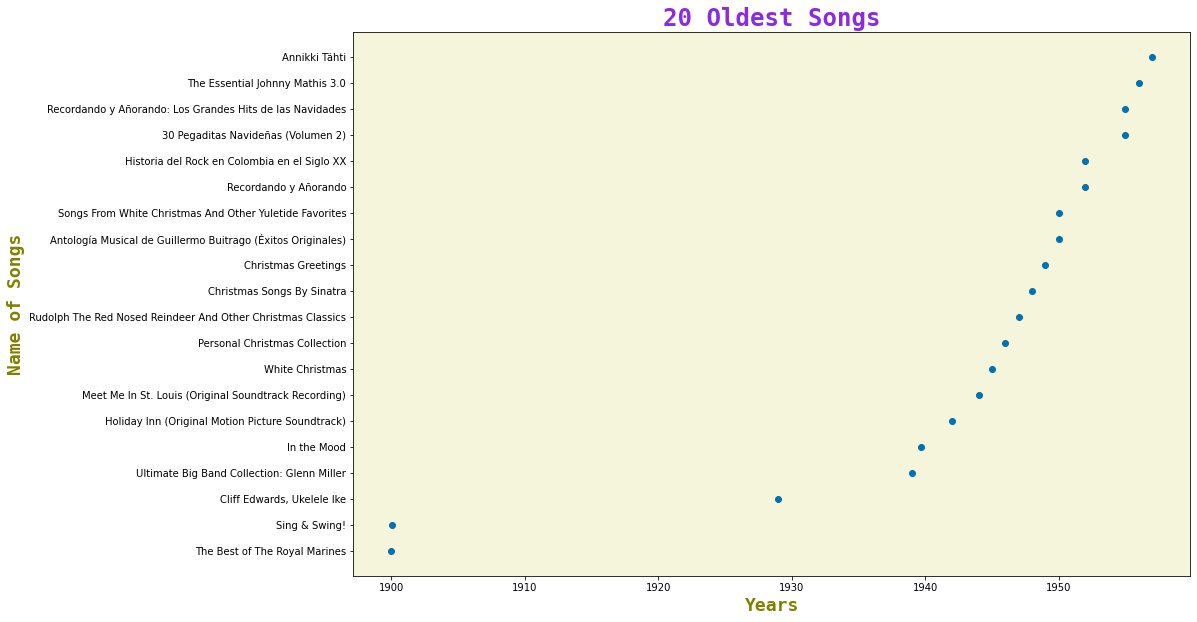

In [54]:
plt.style.use('seaborn-colorblind');
plt.figure(figsize=(15,10));
plt.scatter(Sorting_by_Year.Release_date,Sorting_by_Year.Album);

ax = plt.axes();
ax.set_facecolor("beige");

font1 = {'family':'monospace','color':'blueviolet','size':24}
font2 = {'family':'monospace','color':'olive','size':18}
plt.title("20 Oldest Songs",fontdict=font1,fontweight='bold');
plt.xlabel("Years",fontdict=font2,fontweight='bold');
plt.ylabel("Name of Songs",fontdict=font2,fontweight='bold');

**Observation**: Plotted Line graph to show 20 oldest songs, the song **The Best of The Royal Marines** was the oldest and published in the year of **1899**

### **Q6:How many songs released after 2017?**

For this question, We will drop those columns where there is Null values

We will select the year from `Release_date` Column and fetch the years after 2017 i.e 2018,2019 and 2020 and we will sum the count

In [55]:
df=raw_df[selected_columns].copy()
df.drop(df[df['Release_date']=='n-a'].index,inplace=True)
df[(df['Release_date'] == 'n-a')]

df['year'] = pd.DatetimeIndex(df['Release_date']).year
df['year'] = (df['year'] == 2018) | (df['year'] == 2019) | (df['year'] == 2020)

print("Number of songs that are released after 2017:",sum(df.year))

Number of songs that are released after 2017: 107193


### **Q7:Which song has the highest duration?**

We need to consider `Duration_ms` and `Title` Column.

`duration_ms` column is in milliseconds, hence we will convert it to minutes and then proceed further

Next, we will rename the column `duration_ms` to `duration_min`

In [56]:
df['duration_ms']=df.duration_ms.astype(str).replace("n\x07", 0).astype(int)
group=df.groupby(['duration_ms','Title']).size().to_frame().reset_index()
sort_by_duration=group.sort_values('duration_ms',ascending=False).head(10)
sort_by_duration['duration_ms'] = (sort_by_duration.duration_ms / 1000)/60
sort_by_duration=sort_by_duration.rename(columns = {"duration_ms": "duration_min"})
sort_by_duration

,duration_min,Title,0
58429,60.899283,mix primaveral 2016,1
58428,40.375317,reggaeton karmoso 9,1
58427,29.783833,sas plus / sas pussy,1
58426,29.353750,enganchado santafecino,1
58425,23.584400,peru al mundial,1
58424,22.266667,wilde westen - megasessie - 101barz,1
58423,22.169283,hitazos: amores como el nuestro / que fue / al...,1
58422,18.484667,apocalyptic infinity,2
58421,17.088000,dogs - 2011 remastered version,1
58420,16.248050,guilty 400,3


As you can see in the above result, one of the Title it lenghty, we will shorten it for better visualization

And then, We'll visualize the result with **Matplotlib Bar plot**



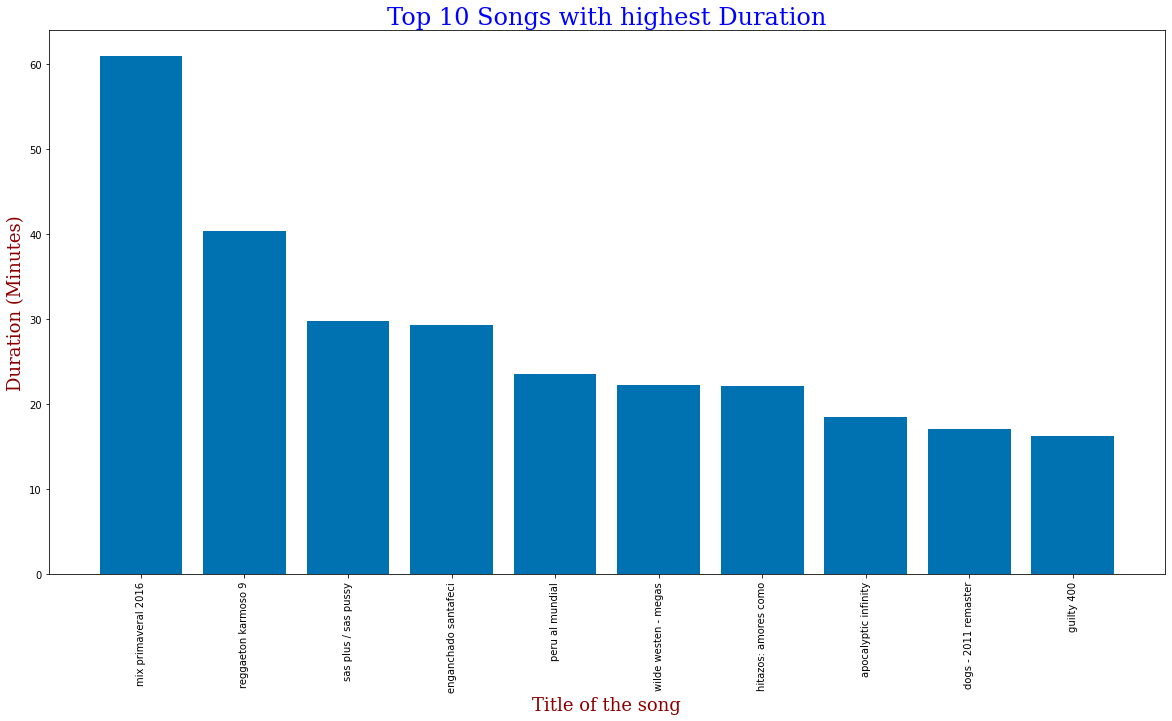

In [57]:
df2 = sort_by_duration.copy()
df2["Title"] = df2["Title"].apply(lambda x: x[:20])
plt.figure(figsize=(20,10))
plt.bar(df2.Title,sort_by_duration.duration_min)

font1 = {'family':'serif','color':'blue','size':24}
font2 = {'family':'serif','color':'darkred','size':18}

plt.title("Top 10 Songs with highest Duration", fontdict = font1);
plt.xlabel("Title of the song", fontdict = font2);
plt.ylabel("Duration (Minutes)", fontdict = font2);

plt.xticks(rotation=90);
plt.show();

**Observation**: The song which has highest duration is **mix primaveral 2016** i.e 60 min

### **Q8:Plot the top 5 songs that are danceable?**

For this question, We will consider `danceability` and `Title` Columns, We will group the data and sort it by the column `danceability` to get top 5 results

In [58]:
df['danceability'] = df.danceability.astype(str).replace("n\x07", 0).astype(float)
groupings=df.groupby(['danceability','Title']).size().to_frame().reset_index()
Sorting_by_5Tracks=groupings.sort_values('danceability',ascending=False).head(5)
Sorting_by_5Tracks

,danceability,Title,0
59371,0.983,generous,2
59370,0.980,trixma,2
59369,0.980,chanel - from jxmtro,1
59368,0.979,enseñame a soñar - original mix,1
59367,0.978,uno,2


We'll visualize the data with **Matplotlib line plot** 

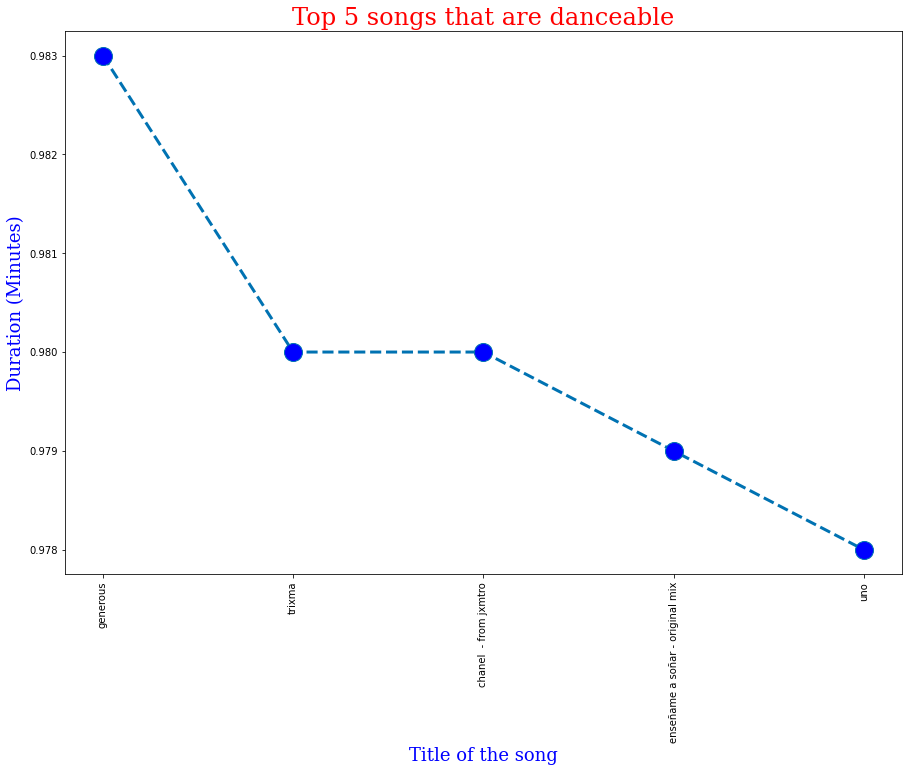

In [59]:
plt.figure(figsize=(15,10))
plt.plot(Sorting_by_5Tracks.Title, Sorting_by_5Tracks.danceability, linestyle='dashed',linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=18);

font1 = {'family':'serif','color':'red','size':24}
font2 = {'family':'serif','color':'blue','size':18}

plt.title("Top 5 songs that are danceable", fontdict = font1)
plt.xlabel("Title of the song", fontdict = font2)
plt.ylabel("Duration (Minutes)", fontdict = font2)
plt.xticks(rotation=90);

**Observation**: The song which is has the highest danceable value is **generous**

**Danceability:**Combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

## Summary

The Exploratory Data Analysis on Spotify HUGE database is completed. Here are the outline's that we have followed:

1. Downloaded the dataset from Kaggle
2. Data preparation and cleaning was done with Pandas
3. Exploratory analysis and visualization was done along with asking and answering interesting questions



The following are the observations I have noticed during Exploratory Analysis:
1. The album **÷(Deluxe)** has the highest Popularity 191873.80, to know how the popularity is calculated click [here](https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years) 
2. The artist named **Dalida** has published highest number of Albums that is **481**, and the artist Nat King Cole Trio has published 349 albums and so on...
3. In complete dataset, highest number songs belongs to **Albums (93703), and Single songs are (74361), Others are 2564**
    - Others Means Compilations

4. The highest number of Albums published by the **Switzerlard** country artists
5. The song named **The Best of The Royal Marines** was the oldest and published in the year of 1899
6. The Number of songs that are **released after 2017 are 142326**
7. The song which has highest duration is **Mix primaveral 2016 i.e 60 min**
8. The song which is has the highest danceable value is **Generous**

## Future works

- We can analyze whether a song is being heard or not in each of the country
- We can also analyse the Artist and their followers count
- Here, in this project i have chosen limited number of columns, We can also go deeply into other columns and bring out many more interesting insights

## Conclusion

We can say that highest number of the songs are Album songs and the highest ALbums are Published by Switzerland country, we can also choose the song we want to listen to based on your preferred genre that are available in the dataset

## Reference

- [Reference for the project](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/assignment/exploratory-data-analysis-project)
- [Opendataset python library](https://github.com/JovianML/opendatasets)
- [Operations in pandas](https://www.javatpoint.com/python-pandas-data-operations)
- [Matplotlib tutorial](https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/)
- [Seaborn tutorial](https://www.javatpoint.com/python-pandas-data-operations)
- [Plotly express tutorial](https://plotly.com/python/)



In [61]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/8smbhavikatti/spotify-songs-analysis


'https://jovian.ai/8smbhavikatti/spotify-songs-analysis'